# Support Vector Machines

In this demo, we will use the SVM implementation in sklearn to classify 2D datasets and understand how to tune the hyperparameters of SVMS.
This notebook is adapted from http://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise6.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline

### Simple Linear 2D Dataset
Load the dataset:

In [2]:
raw_data = loadmat('ex6data1.mat')
raw_data

{'X': array([[ 1.9643  ,  4.5957  ],
        [ 2.2753  ,  3.8589  ],
        [ 2.9781  ,  4.5651  ],
        [ 2.932   ,  3.5519  ],
        [ 3.5772  ,  2.856   ],
        [ 4.015   ,  3.1937  ],
        [ 3.3814  ,  3.4291  ],
        [ 3.9113  ,  4.1761  ],
        [ 2.7822  ,  4.0431  ],
        [ 2.5518  ,  4.6162  ],
        [ 3.3698  ,  3.9101  ],
        [ 3.1048  ,  3.0709  ],
        [ 1.9182  ,  4.0534  ],
        [ 2.2638  ,  4.3706  ],
        [ 2.6555  ,  3.5008  ],
        [ 3.1855  ,  4.2888  ],
        [ 3.6579  ,  3.8692  ],
        [ 3.9113  ,  3.4291  ],
        [ 3.6002  ,  3.1221  ],
        [ 3.0357  ,  3.3165  ],
        [ 1.5841  ,  3.3575  ],
        [ 2.0103  ,  3.2039  ],
        [ 1.9527  ,  2.7843  ],
        [ 2.2753  ,  2.7127  ],
        [ 2.3099  ,  2.9584  ],
        [ 2.8283  ,  2.6309  ],
        [ 3.0473  ,  2.2931  ],
        [ 2.4827  ,  2.0373  ],
        [ 2.5057  ,  2.3853  ],
        [ 1.8721  ,  2.0577  ],
        [ 2.0103  ,  2.3546  ],
   

We'll visualize it as a scatter plot where the class label is denoted by a symbol (+ for positive, o for negative).

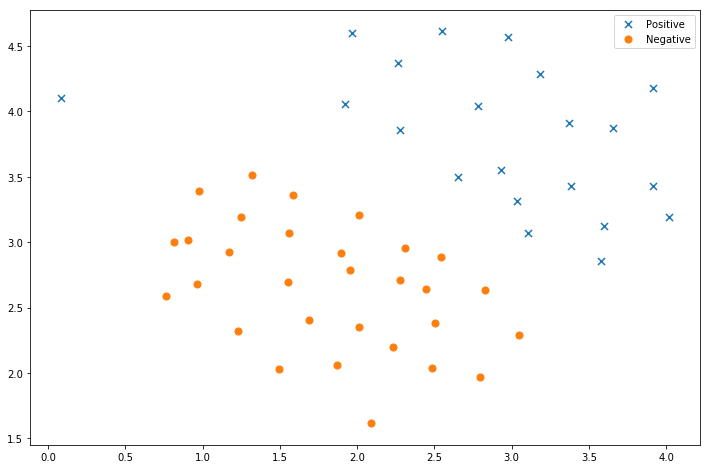

In [5]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine experimenting with various values of C to learn the class boundary. 

#### Recap: How to Choose C
###### Large C:
* Similar to hard margin SVM - goal is to misclassify few training points
* Often results in small margins
* Very sensitive to outliers
* Risk of overfitting

###### Small C:
* Maximizes margin at cost of misclassifying training data points
* Risk of underfitting

In [14]:
### YOUR CODE HERE - build svm
from sklearn import svm
svc = svm.LinearSVC(C=1, loss='hinge', max_iter=1000)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [15]:
### YOUR CODE HERE - test svm
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

It appears that it mis-classified the outlier.  Let's see what happens with a larger value of C.

In [16]:
### YOUR CODE HERE - build svm
### YOUR CODE HERE - test svm
svc2 = svm.LinearSVC(C=50, loss='hinge', max_iter=1000)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

In [17]:
svc.coef_[0][0]*data['X1'] + svc.coef_[0][1]*data['X2'] + svc.intercept_[0]

0     0.799283
1     0.381413
2     1.373887
3     0.519056
4     0.332250
5     0.867009
6     0.684546
7     1.608087
8     0.831663
9     1.163496
10    1.070559
11    0.228383
12    0.329075
13    0.792560
14    0.313786
15    1.270874
16    1.207545
17    0.997948
18    0.563200
19    0.388117
20   -0.436924
21   -0.310312
22   -0.687102
23   -0.554786
24   -0.333638
25   -0.294535
26   -0.440920
27   -0.983779
28   -0.685934
29   -1.328247
30   -1.004007
31   -1.492414
32   -0.612454
33   -0.684677
34   -1.000713
35   -1.153008
36   -1.578105
37   -1.356595
38   -1.033388
39   -1.186108
40   -0.773062
41   -0.768312
42   -0.468360
43   -1.000000
44   -0.511009
45   -0.858346
46   -1.558167
47   -0.255935
48   -1.114752
49   -1.547653
50   -0.712577
dtype: float64

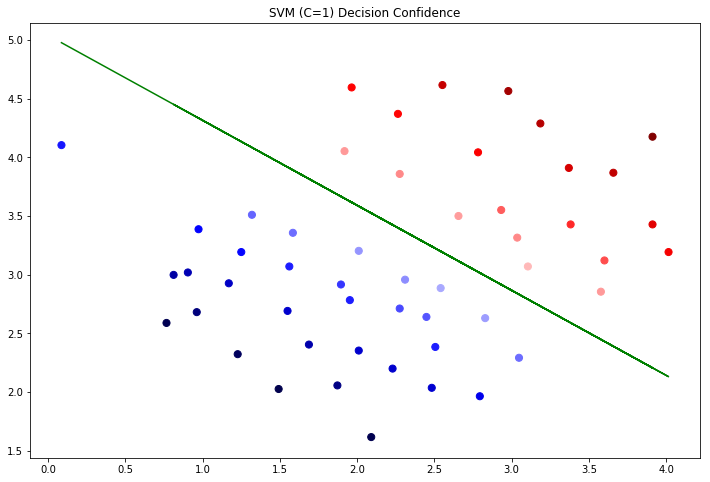

In [18]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM (C=1) Decision Confidence')
### YOUR CODE HERE - plotting the decision boundary
plt.plot(data['X1'], -(svc.coef_[0][0]*data['X1'] + svc.intercept_[0]) / svc.coef_[0][1], c='green')

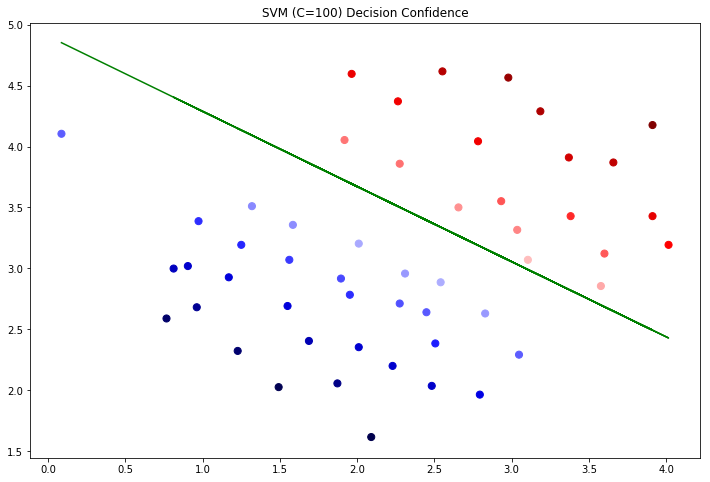

In [20]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM (C=100) Decision Confidence')
### YOUR CODE HERE - plotting the decision boundary
plt.plot(data['X1'], -(svc2.coef_[0][0]*data['X1'] + svc2.intercept_[0]) / svc2.coef_[0][1], c='green')

The difference is a bit subtle but when C=1, the decision boundery is a much steeper negative line than when C=1000. In an attempt to classify the outlier, when C=1000, the decision boundary overfits.

### Nonlinear Dataset

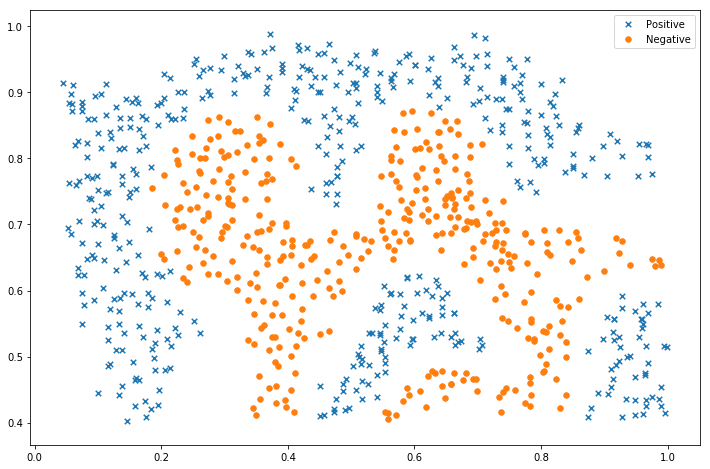

In [24]:
raw_data = loadmat('ex6data2.mat')

data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data['y']

positive = data[data['y'].isin([1])]
negative = data[data['y'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

In [ ]:
### YOUR CODE HERE - build svm
svc = svm.SVC(c=100, gamma=10, probability=True)

In [22]:
### YOUR CODE HERE - test svm
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

0.5550405561993047

In [23]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

### Using sklearn Grid_Search to find optimal hyperparameters 

In [ ]:
### YOU CODE HERE - do cross val
from sklearn import svm, grid_search
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    gammas= [0.001, 0.01, 0.1, 1, 10, 100, 100]
    param_grid = {'C': Cs, 'gamma':gammas}
    search = grid_search.GridSearchCV(svm.SVC(kernel='rbf'))

In [ ]:
svc_param_selection(data[['X1', 'X2']], data['y'], 5)

In [ ]:
svc = svm.SVC(C=10, gamma=100, probability=True)
svc

In [ ]:
svc.fit(data[['X1', 'X2']], data['y'])
svc.score(data[['X1', 'X2']], data['y'])

In [ ]:
data['Probability'] = svc.predict_proba(data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=30, c=data['Probability'], cmap='Reds')